In [24]:
%pip install -q pandas matplotlib scikit-learn seaborn 

Note: you may need to restart the kernel to use updated packages.


In [25]:
# python labraries for analysis and visualization
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [26]:
# Load the dataset
try:
    # Reading the dataset with correct delimiter
    file_path = "winequality-white.csv" 
    data = pd.read_csv(file_path, delimiter=";")
    print("Dataset successfully loaded.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset successfully loaded.


In [27]:
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5  

In [28]:
# Check the structure and missing values
print("\nDataset info:")
print(data.info())
print("\nNumber of missing values in each column:")
print(data.isnull().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Number of missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid 

In [29]:
# Clean the dataset (drop rows with missing values, if any)
data.dropna(inplace=True)
print("\nDataset cleaned. Number of rows after cleaning:", len(data))


Dataset cleaned. Number of rows after cleaning: 4898


In [30]:
# Compute basic statistics
print("\nBasic statistics of numerical columns:")
print(data.describe())


Basic statistics of numerical columns:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min     

In [32]:
# Grouping by 'quality' and computing mean of other columns
quality_grouped = data.groupby('quality').mean()
print("\nMean values for each quality group:")
print(quality_grouped)
# Identify patterns or interesting findings
print("\nInteresting observations:")
print("1. Higher-quality wine seems to have higher alcohol content.")
print("2. Residual sugar doesn't show a clear pattern with quality.")


Mean values for each quality group:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.129448          0.381227     0.304233        4.628221   
5             6.933974          0.302011     0.337653        7.334969   
6             6.837671          0.260564     0.338025        6.441606   
7             6.734716          0.262767     0.325625        5.186477   
8             6.657143          0.277400     0.326514        5.671429   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050098            23.358896            125.279141  0.994277   
5    

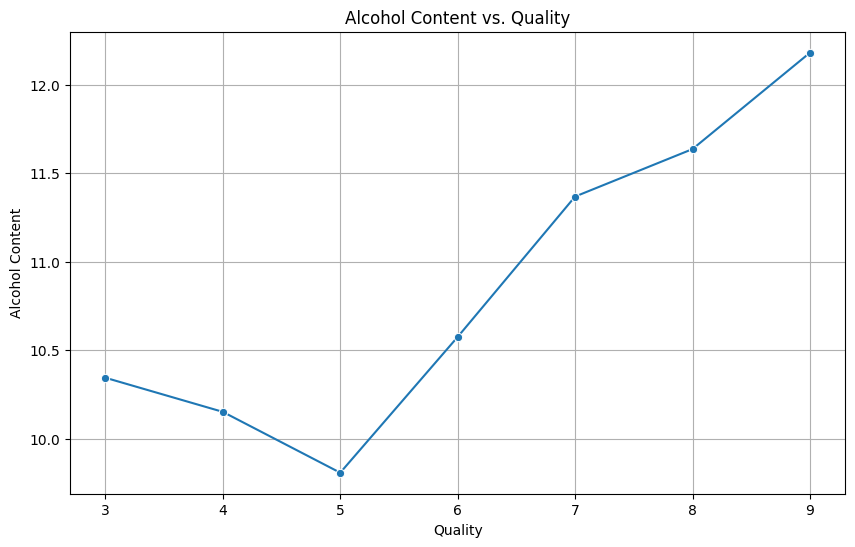

In [33]:


# 1. Line chart showing trends over quality levels for alcohol content
plt.figure(figsize=(10, 6))
sns.lineplot(data=quality_grouped, x=quality_grouped.index, y="alcohol", marker="o")
plt.title("Alcohol Content vs. Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol Content")
plt.grid(True)
plt.show()



C:\Users\pc\AppData\Local\Temp\ipykernel_17220\2519925616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quality_grouped, x=quality_grouped.index, y="sulphates", palette="viridis")


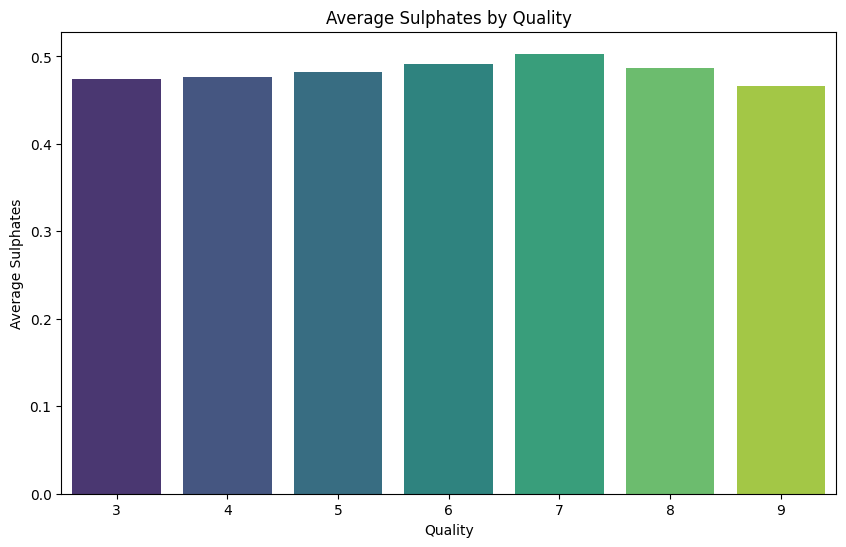

In [34]:
# 2. Bar chart comparing average sulphates per quality
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_grouped, x=quality_grouped.index, y="sulphates", palette="viridis")
plt.title("Average Sulphates by Quality")
plt.xlabel("Quality")
plt.ylabel("Average Sulphates")
plt.show()

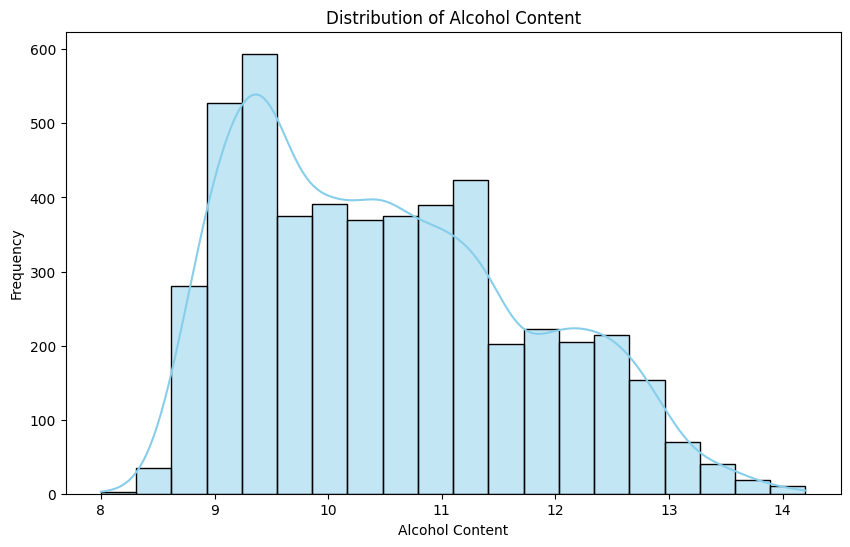

In [35]:
# 3. Histogram of alcohol distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['alcohol'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.show()

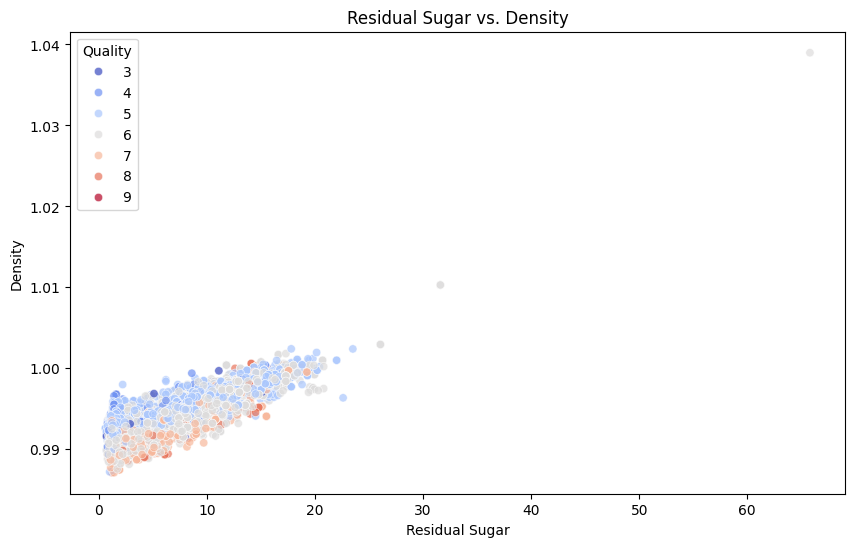

In [36]:
# 4. Scatter plot of residual sugar vs. density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="residual sugar", y="density", hue="quality", palette="coolwarm", alpha=0.7)
plt.title("Residual Sugar vs. Density")
plt.xlabel("Residual Sugar")
plt.ylabel("Density")
plt.legend(title="Quality")
plt.show()